# Loading data items CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('paper')
sns.set_style('white')

In [2]:
fname = 'data_items.csv'
df = pd.read_csv(fname, header=1)

In [3]:
df = df.iloc[:195, :]
df = df.dropna(axis=0, how='all')
df = df.dropna(axis=1, how='all', thresh=int(df.shape[0] * 0.1))

In [4]:
df.head()

,Title,Year,Authors,Journal/origin,Arxiv preprint?,Lab / School / Company,Nb of pages,Domain,domain1,domain2,...,Baseline model type,Statistical analysis of performance,Analysis of learned parameters,Discussion,Limitations/Obstacles,Code Available?,Limited Data,Others & Comments,Analyzed by,Reviewed by
0,EEG-signals based cognitive workload detection...,2018.0,"Almogbel, Dang & Kameyama",IEEE Conference on Advanced Communication Tech...,No,Waseda University,4.0,Transportation,Classification of EEG signals,Monitoring,...,None,NaN,No,"""This study does not impose in any way a direc...",NaN,No,No,24 sessions of 15 to 30 minutes over 1 month o...,Yannick,Isabela
1,Automatic ocular artifacts removal in EEG usin...,2018.0,"Yang, Duan, Fan, Hu & Wang",Biomedical Signal Processing and Control,No,Key Laboratory of Power Station Automation Tec...,11.0,Cleaning EEG Signals,Improvement of processing tools,Signal cleaning,...,Traditional pipeline,NaN,NaN,"""Compared with the classical OAs removal metho...",NaN,No,No,Poorly written... :( The way some elements are...,Yannick,Hubert
2,An end-to-end framework for real-time automati...,2018.0,"Patanaik, Ong, Gooley, Ancoli-Israel & Chee",Sleep,No,"Duke-NUS Medical School, Singapore\nUniversity...",11.0,Sleep,Classification of EEG signals,Clinical,...,None,NaN,No,"""... our framework provides a practicable, val...",N/M,No,No,"Great paper, with most of the information avai...",Yannick,Hubert
3,Epileptic Seizure Detection: A Deep Learning A...,2018.0,"Hussein, Palangi, Ward & Wang",Arxiv,Yes,UBC,12.0,Epilepsy,Classification of EEG signals,Clinical,...,Traditional pipeline,NaN,No,"Compared to the state-of-the-art methods, this...",Unbalanced class distributions,No,No,"""To the best of our knowledge, this is the mos...",Yannick,Hubert
4,Development of a brain computer interface inte...,2018.0,"Perez-Benitez, Perez-Benitez & Espina-Hernandez","IEEE Conference on Electronics, Communications...",No,"National Polytechnic Institute, Mexico",7.0,BCI,Classification of EEG signals,BCI,...,Traditional pipeline,NaN,Yes (visualization of learned parameters),The analysis of the DNN first layer weights re...,N/M,No,No,They say that it could go up to 220 commands!!...,Yannick,Hubert


## Sanity checks

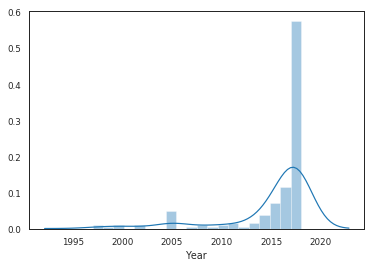

In [5]:
sns.distplot(df['Year'].dropna(axis=0))

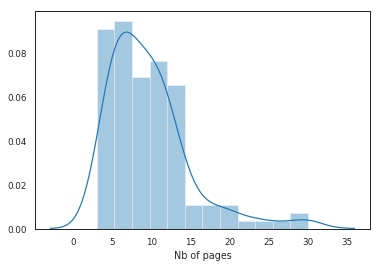

In [6]:
sns.distplot(df['Nb of pages'].dropna(axis=0))

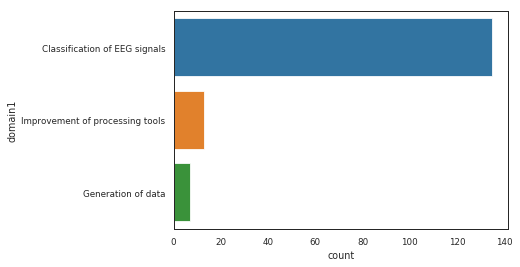

In [7]:
sns.countplot(y='domain1', data=df)

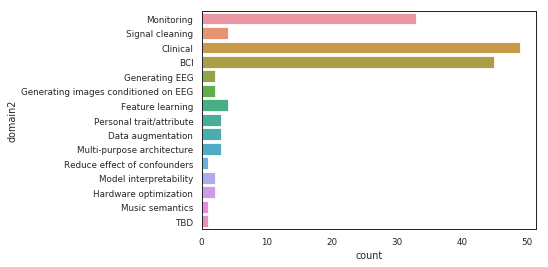

In [8]:
sns.countplot(y='domain2', data=df)

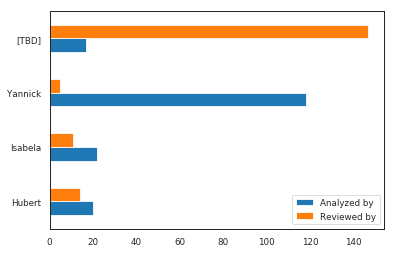

In [9]:
df[['Analyzed by', 'Reviewed by']].apply(pd.value_counts).plot(kind='barh')

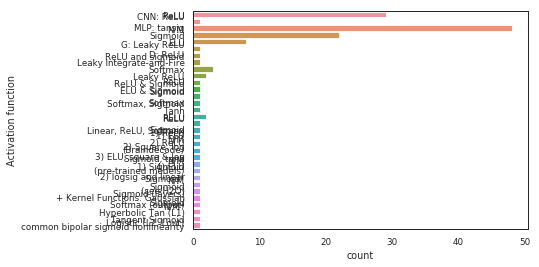

In [10]:
sns.countplot(y='Activation function', data=df)

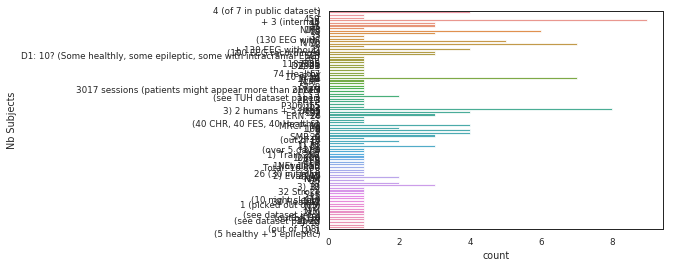

In [11]:
sns.countplot(y='Nb Subjects', data=df)

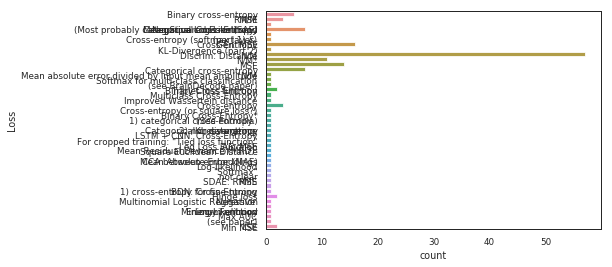

In [12]:
sns.countplot(y='Loss', data=df)

## Yannick addons. (temp stuff)

#1 - Download:
https://docs.google.com/spreadsheet/ccc?key=1smpU0WSlSq-Al2u_QH3djGn68mTuHlth2fNJTrD3wa8&output=csv

#2 - Rename it to "papers.csv"

In [15]:
fname = 'papers.csv'
df = pd.read_csv(fname, header=1)

In [12]:
df = df.dropna(axis=0, how='all')
df = df.dropna(axis=1, how='all', thresh=int(df.shape[0] * 0.1))

In [16]:
df.head()

,Unnamed: 0,Title,Year,Authors,Journal / Origin,Arxiv,Lab / School / Company,Pages,Unnamed: 8,Domain,...,Statistical analysis of performance,Analysis of learned parameters,Discussion,Limitations,Code available,Limited data,Others & Comments,Unnamed: 74,First Reader,Second Reader
0,NaN,EEG-signals based cognitive workload detection...,2018.0,"Almogbel, Dang & Kameyama",IEEE Conference on Advanced Communication Tech...,No,Waseda University,4.0,NaN,Transportation,...,NaN,No,"""This study does not impose in any way a direc...",NaN,No,No,24 sessions of 15 to 30 minutes over 1 month o...,NaN,Yannick,Isabela
1,NaN,Automatic ocular artifacts removal in EEG usin...,2018.0,"Yang, Duan, Fan, Hu & Wang",Biomedical Signal Processing and Control,No,Key Laboratory of Power Station Automation Tec...,11.0,NaN,Cleaning EEG Signals,...,NaN,NaN,"""Compared with the classical OAs removal metho...",NaN,No,No,Poorly written... :( The way some elements are...,NaN,Yannick,Hubert
2,NaN,An end-to-end framework for real-time automati...,2018.0,"Patanaik, Ong, Gooley, Ancoli-Israel & Chee",Sleep,No,"Duke-NUS Medical School, Singapore\nUniversity...",11.0,NaN,Sleep,...,NaN,No,"""... our framework provides a practicable, val...",N/M,No,No,"Great paper, with most of the information avai...",NaN,Yannick,Hubert
3,NaN,Epileptic Seizure Detection: A Deep Learning A...,2018.0,"Hussein, Palangi, Ward & Wang",Arxiv,Yes,UBC,12.0,NaN,Epilepsy,...,NaN,No,"Compared to the state-of-the-art methods, this...",Unbalanced class distributions,No,No,"""To the best of our knowledge, this is the mos...",NaN,Yannick,Hubert
4,NaN,Development of a brain computer interface inte...,2018.0,"Perez-Benitez, Perez-Benitez & Espina-Hernandez","IEEE Conference on Electronics, Communications...",No,"National Polytechnic Institute, Mexico",7.0,NaN,BCI,...,NaN,Yes (visualization of learned parameters),The analysis of the DNN first layer weights re...,N/M,No,No,They say that it could go up to 220 commands!!...,NaN,Yannick,Hubert


In [15]:
# Inspired by: AKuederle
# https://github.com/AKuederle/Py-Tex-automation-example

import pandas as pd
import tex_utils

#papers = pd.read_csv('./paperx.csv')
papers = pd.read_csv('./papers.csv', header=1)

papers = papers.dropna(axis=1, how='all')

domains = set(papers['Domain'].dropna(axis=0, how='all'))

nested_datasets = {}

for domain in domains:
    print('Domain:' + domain)

    sub_papers = papers[papers['Domain'] == domain]
    sub_datasets = sub_papers['Dataset name'].dropna(axis=0, how='all')

    # 1 Paper might used multiple datasets
    l = [dsname.split(";\n") for dsname in sub_datasets]
    sub_datasets = set([item for sublist in l for item in sublist])

    # Handle exception to make it "prettier".
    # Exception 1: BCI Competition Datasets.
    # Exception 2: Datasets used only once.

    nested_list = {k: list(sub_papers[sub_papers['Dataset name'].str.contains(k)]['Citation']) for k in sub_datasets}
    nested_datasets[domain] = nested_list

print('LaTeX!')
template = tex_utils.get_template('./table_template.tex')
variable_dict = {'datasets': nested_datasets}
texstr = tex_utils.compile_pdf_from_template(template, variable_dict, './dataset_table.pdf')
print('Done!')

print(texstr)

Domain:General EEG classification
Domain:Other
Domain:Sleep
Domain:BCI
Domain:Transportation
Domain:Generating EEG Signals
Domain:General Affective
Domain:Cleaning EEG Signals
Domain:General Cognitive
Domain:Epilepsy
Domain:Other Pathology*
LaTeX!
/Users/yannick/Documents/PhD/DL-EEG_Portal/dl-eeg-review/tex_build
Done!
\documentclass[12pt,a4paper]{article} % din a4, 11 pt schrift, einseitig,

\begin{document}

\begin{table}
\caption{Datasets per Domains}
{\begin{tabular}{p{4.5cm}p{4cm}p{7cm}}
\hline Domain & Datasets & Papers \\
\hline BCI
    & BCI competition II - Ia &  \cite{Ding2015},  \\
    & BCI competition II - Ib &  \cite{Ding2015},  \\
    & BCI Competition II - III &  \cite{Zhang2018b},  \cite{[TBD]},  \\
    & BCI Competition III - II &  \cite{Manor2015},  \cite{Cecotti2011},  \\
    & BCI Competition III - IIb &  \cite{Manor2015},  \\
    & BCI Competition III - IVa &  \cite{Gao2018},  \\
    & BCI Competition IV - IIa &  \cite{Lawhern2018},  \cite{Sakhavi2017},  \cite{Sch

/Users/yannick/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
